In [8]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from PIL import Image

In [9]:
train = pd.read_csv('class_train.csv', sep = ',')
del train[train.columns[0]]
train.head()

year  season  cl_id month_max  month_range  PERIOD_YEAR  channel_type  \
0  2017       1      0   2017-12            2         2017             0   
1  2017       4      1   2017-10            3         2017             0   
2  2017       3      5   2017-06            3         2017             0   
3  2017       3      9   2017-07            2         2017             0   
4  2017       4     10   2017-09            2         2017             0   

   MCC_popular  MCC_unpopular  amount_of_MCC  ...  sum_trx_cat_7  \
0         5411           5200              5  ...       0.000000   
1         5814           5942             23  ...       0.000000   
2         5411           9222             34  ...       0.011735   
3         5999           5411              5  ...       0.000000   
4         5411           8099             36  ...       0.000000   

   sum_trx_cat_8  sum_trx_cat_9  threeMonth_sum  sum_month2  sum_month1  \
0       0.000000       0.000000        64383.00    0.011913    0.000000   
1       0.000000       0.234030       213647.78    0.054084    0.928094   
2       0.012802       0.141891       468670.77    0.383644    0.165617   
3       0.117742       0.512177       849315.09    0.296190    0.217477   
4       0.004803       0.375597      1124343.99    0.093017    0.822974   

   sum_month0  mean_time  max_time  target_flag  
0    0.988087   0.321932     994.0            0  
1    0.017821   0.067308     312.0            0  
2    0.450739   0.156250      96.0            1  
3    0.486333   0.120430     465.0            0  
4    0.084008   0.090909      44.0            0  

[5 rows x 44 columns]

### Column Legend
* period - month of the transaction  
* cl_id - client id  
* MCC - seller category code  
* channel_type - customer acquisition channel  
* currency - currency  
* TRDATETIME - date / time of the transaction  
* amount - transaction amount  
* trx_category - transaction type  
* target_flag - whether the customer will continue to use the product after the grace period (1/0) (target)  
* target_sum - the sum of POS transactions for three future months (target)  

In [10]:
# removal of categorical features
drop_features = ['PERIOD_YEAR','month_max']
train.drop(columns = drop_features, inplace = True)
y_class = train[['currency_popular']]

In [11]:
count = 0
for col in train.columns:
    print(count,' --- ',col)
    count += 1

0  ---  year
1  ---  season
2  ---  cl_id
3  ---  month_range
4  ---  channel_type
5  ---  MCC_popular
6  ---  MCC_unpopular
7  ---  amount_of_MCC
8  ---  sum_MCC_5411
9  ---  sum_MCC_6011
10  ---  sum_MCC_5814
11  ---  sum_MCC_5812
12  ---  sum_MCC_5499
13  ---  sum_MCC_5541
14  ---  sum_MCC_5912
15  ---  currency_popular
16  ---  currency_unpopular
17  ---  amount_of_currency
18  ---  sum_currency_810
19  ---  sum_currency_978
20  ---  sum_currency_840
21  ---  trx_category_popular
22  ---  tranz_amount
23  ---  tranz_sum
24  ---  tranz_max
25  ---  sum_trx_cat_0
26  ---  sum_trx_cat_1
27  ---  sum_trx_cat_2
28  ---  sum_trx_cat_3
29  ---  sum_trx_cat_4
30  ---  sum_trx_cat_5
31  ---  sum_trx_cat_6
32  ---  sum_trx_cat_7
33  ---  sum_trx_cat_8
34  ---  sum_trx_cat_9
35  ---  threeMonth_sum
36  ---  sum_month2
37  ---  sum_month1
38  ---  sum_month0
39  ---  mean_time
40  ---  max_time
41  ---  target_flag


In [12]:
X_train = train[['sum_MCC_5812','sum_MCC_5814','tranz_amount','amount_of_MCC','tranz_sum','sum_MCC_6011','sum_trx_cat_1','sum_trx_cat_2','sum_trx_cat_3','sum_trx_cat_5','sum_trx_cat_6','sum_trx_cat_8']]
X_3dim = train[['amount_of_MCC','tranz_sum','sum_MCC_6011']]

X_train = pd.concat([X_train,pd.DataFrame(y_class)],axis=1)
X_3dim = pd.concat([X_3dim,pd.DataFrame(y_class)],axis=1)

# deleting values with gaps
X_train = X_train.dropna()
X_3dim = X_3dim.dropna()

color = train['currency_popular'].apply(lambda x: int(x/100))

X_train = X_train.iloc[:,0:13]
X_3dim = X_3dim.iloc[:,0:3]
X_train.head()

sum_MCC_5812  sum_MCC_5814  tranz_amount  amount_of_MCC  tranz_sum  \
0      0.000000      0.000000             5              5   1.000000   
1      0.014884      0.385874           104             23   1.252426   
2      0.007060      0.000527           142             34   1.165785   
3      0.000000      0.000000            39              5   1.000000   
4      0.000284      0.001788           463             36   1.000000   

   sum_MCC_6011  sum_trx_cat_1  sum_trx_cat_2  sum_trx_cat_3  sum_trx_cat_5  \
0      0.310641       0.000000       0.567883            0.0       0.310641   
1      0.678687       0.000000       0.000000            0.0       0.444657   
2      0.443808       0.000000       0.072286            0.0       0.277380   
3      0.635806       0.349635       0.000000            0.0       0.005887   
4      0.759554       0.008894       0.019294            0.0       0.379154   

   sum_trx_cat_6  sum_trx_cat_8  currency_popular  
0       0.121476       0.000000               810  
1       0.573739       0.000000               810  
2       0.619840       0.012802               810  
3       0.014559       0.117742               810  
4       0.178732       0.004803               810

C:\Users\anaxa\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'PCA into two components from 3D space')

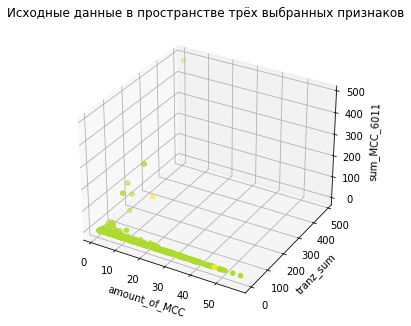

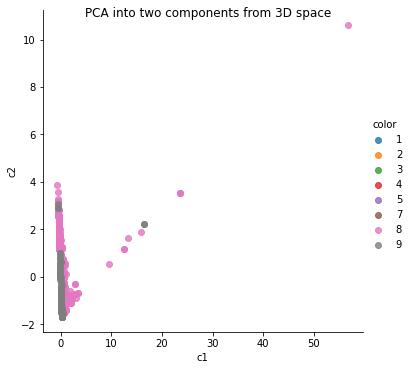

In [13]:
# For multidimensional feature space
pca = PCA(n_components=3)

X_train_new = pd.DataFrame(pca.fit_transform(X_train))
scaler = StandardScaler()
X_train_new = pd.DataFrame(scaler.fit_transform(X_train_new))

color = round(color)
X_train_new = pd.concat([X_train_new,pd.DataFrame(color)], axis=1)
X_train_new.columns = ['c1','c2','c3','color']
X_train_new.head()

# For three-dimensional feature space
pca2 = PCA(n_components=2)
pca1 = PCA(n_components=1)

# Go to main components
X_3dim_new = pd.DataFrame(pca2.fit_transform(X_3dim))
X_3dim_new1 = pd.DataFrame(pca1.fit_transform(X_3dim))
scaler = StandardScaler()

# Scaling main components
X_3dim_new = pd.DataFrame(scaler.fit_transform(X_3dim_new))
X_3dim_new1 = pd.DataFrame(scaler.fit_transform(X_3dim_new1))
color = round(color)

# Adding a color scale
X_3dim_new = pd.concat([X_3dim_new,pd.DataFrame(color)], axis=1)
X_3dim_new.columns = ['c1','c2','color']
X_3dim_new1 = pd.concat([X_3dim_new1,pd.DataFrame(color)], axis=1)
X_3dim_new1.columns = ['c1','color']

# Graph in the space of 3 dimensions of the original data
xs=X_3dim[['amount_of_MCC']]
ys=X_3dim[['tranz_sum']]
zs=X_3dim[['sum_MCC_6011']] 
c= X_train_new['color'].values
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs, ys, zs, c = c)
ax.set_xlabel('amount_of_MCC')
ax.set_ylabel('tranz_sum')
ax.set_zlabel('sum_MCC_6011')
ax.set_title('Исходные данные в пространстве трёх выбранных признаков')
x = []
for i in range(len(X_3dim_new1['c1'].values)):
    x.append(i)

#PCA into two components

lm = sns.lmplot('c1','c2',data=X_3dim_new ,hue='color',fit_reg=False)
fig = lm.fig 
fig.suptitle("PCA into two components from 3D space", fontsize=12)

Text(0, 0.5, 'c1')

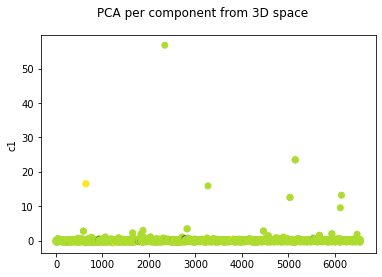

In [14]:
#PCA per component
fig = plt.figure()
plt.scatter(x,X_3dim_new1[['c1']],c=color)
fig.suptitle('PCA per component from 3D space')
plt.ylabel('c1')

Text(0.5, 0.92, 'PCA Result for Multidimensional Input Space')

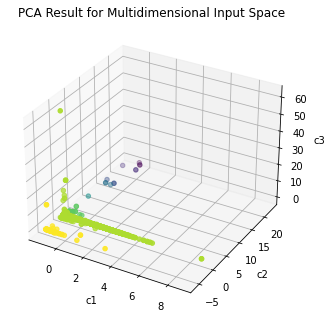

In [15]:
# PCA result for multidimensional input space
xs=X_train_new[['c1']]
ys=X_train_new[['c2']]
zs=X_train_new[['c3']] 
c= X_train_new['color'].values
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs, ys, zs, c = c)
ax.set_xlabel('с1')
ax.set_ylabel('c2')
ax.set_zlabel('c3')
ax.set_title('PCA Result for Multidimensional Input Space')

Text(0.5, 0.92, 'TSNE result for multidimensional input space')

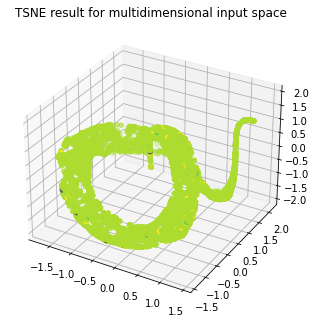

In [21]:
tsne = TSNE(n_components=3, perplexity=30, n_iter=250)
X_tsne = pd.DataFrame(tsne.fit_transform(X_train))
scaler = StandardScaler()
X_tsne = pd.DataFrame(scaler.fit_transform(X_tsne))
X_tsne = pd.concat([X_tsne,pd.DataFrame(color)], axis=1)
X_tsne.columns = ['c1','c2','c3','color']

xs=X_tsne[['c1']]
ys=X_tsne[['c2']]
zs=X_tsne[['c3']] 
c= X_tsne['color'].values
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs, ys, zs, c = c)
ax.set_title('TSNE result for multidimensional input space')

To improve performance, you can also use the multithreaded implementation of TSNE - MulticoreTSNE.

Installing a third party library:
pip install MulticoreTSNE

Library connection:
from MulticoreTSNE import MulticoreTSNE as TSNE

Application for 8-core configuration
tsne = TSNE (n_components = 3, perplexity = 20, n_jobs = 8)
Y = tsne.fit_transform (X_train)

Useful post on using t-sne efficiently (interactively available):
"How to Use t-SNE Effectively"
https://distill.pub/2016/misread-tsne/

<ipython-input-17-bb4ea57f8bc2>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(X_train.corr(), dtype=np.bool)


<AxesSubplot:>

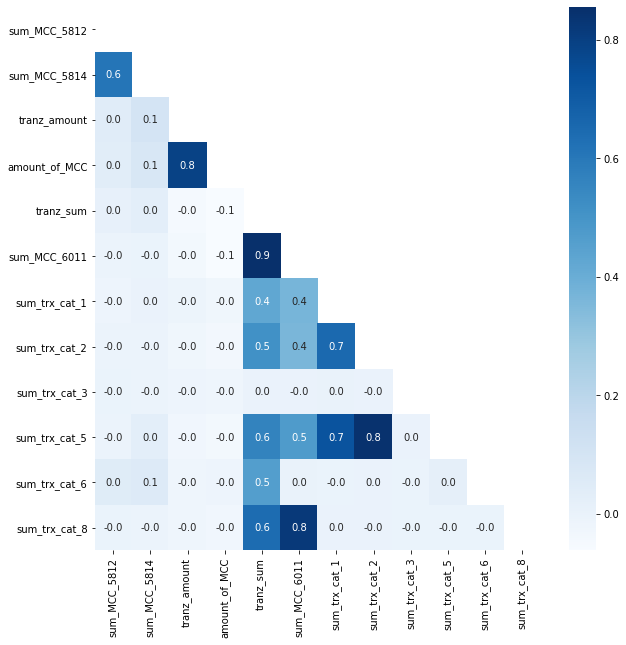

In [17]:
# selection of columns to build a correlation matrix
X_train = train[['sum_MCC_5812','sum_MCC_5814','tranz_amount','amount_of_MCC','tranz_sum','sum_MCC_6011','sum_trx_cat_1','sum_trx_cat_2','sum_trx_cat_3','sum_trx_cat_5','sum_trx_cat_6','sum_trx_cat_8']]

# building a diagonal mask
mask = np.zeros_like(X_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(X_train.corr(), mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'Blues')


In [24]:
# Confidence interval for the correlation coefficient
x = train['amount_of_MCC'].apply(lambda x: float(x))
y = train['tranz_amount'].apply(lambda x: float(x))
r, p = stats.pearsonr(x,y)
r_z = np.arctanh(r) # matches Fisher transform
# Corresponding standard deviation
se = 1/np.sqrt(x.size-3)
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se

print('Correlation coefficient = ', r)
print('Confidence interval for the correlation coefficient ', lo_z, hi_z)

    

Correlation coefficient =  0.792358967543859
Confidence interval for the correlation coefficient  1.0535230060249066 1.101954100874917
